In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gaussianWave as gw

In [7]:
psi0 = gw.gaussianWavefunction("ethylene_casscf_2_6.fchk","ethylene_casscf_2_6.log")

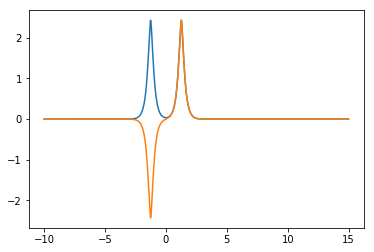

In [12]:
zrange = np.arange(-10,15,0.01)
val = np.ones((zrange.shape[0],10),dtype=float)
for i,z in enumerate(zrange):
    val[i,:] *= psi0.mo_values([0,0,z])[:10]
plt.plot(zrange,val[:,0])
plt.plot(zrange,val[:,1])

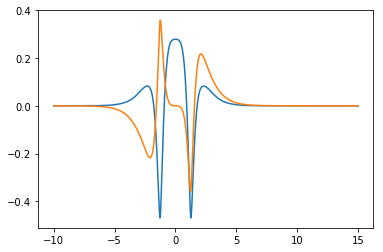

In [227]:
plt.plot(zrange,val[:,2])
plt.plot(zrange,val[:,3])

In [5]:
psi1 = gaussianWavefunction("ethylene_casscf_2_6.root2.fchk","ethylene_casscf_2_6.root2.log")

In [6]:
psi1.occupancies

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.70438981, 0.70438981, 0.06192738,
       0.06192738, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

$ \int \Psi_1(r^N) \hat{\mu} \Psi_0(r^N) dr^N  $ 

$ = \int \prod_{i,j}\chi_{1,i} \sum_kr_k \chi_{0,j}dr^N$

In [19]:
def compute_dipole_moment(psi1,psi0,xRange,yRange,zRange):
    
    dipoleInt = np.zeros(3,dtype=float)
    for x in xRange:
        for y in yRange:
            for z in zRange:
                psi0MOs = psi0.mo_values([x,y,z])
                psi1MOs = psi1.mo_values([x,y,z])
                psi0MOs *= psi0.occupancies
                psi1MOs *= psi1.occupancies
                for i in range(psi0.nBasisFunctions):
                    for j in range(psi1.nBasisFunctions):
                        dipoleInt[0] = psi0MOs[i]*x*psi1MOs[j]
                        dipoleInt[1] = psi0MOs[i]*y*psi1MOs[j]
                        dipoleInt[2] = psi0MOs[i]*z*psi1MOs[j]
    return dipoleInt

In [ ]:
xRange = np.arange(-10,10,0.1)
yRange = np.arange(-10,10,0.1)
zRange = np.arange(-10,10,0.1)
mu = compute_dipole_moment(psi0,psi0,xRange,yRange,zRange)

In [ ]:
print(mu)